# Final Project for AI 221

AI 221 | 1st Sem AY 2024-2025  
Students: Jemima Bian Anila, Joshua Cantor, Michael Spencer Quinto, MEng in AI  
Instructors: Dr. Miguel Remolona | Dr. Jon Dewitt Dalisay

## Dataset

https://data.mendeley.com/datasets/tsvdyhbphs/1

https://www.kaggle.com/datasets/jaydepaolomirandilla/philippine-medicinal-plant-leaf-dataset/data


In [1]:
import sys
from pathlib import Path
  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)

In [2]:
# Add project root directory to Python path to allow importing from src folder
notebook_dir = Path("__file__").resolve().parent
project_root = Path.cwd().parent
sys.path.append(str(project_root))

# Import utility modules from `src` folder

Note: all reusable code like transformations for the dataframes, etc. can be found inside the `src` folder and are imported here for better modularity and version control


# 1. Exploratory Data Analysis


## 1.1 Data Loading and Inspection


In [3]:
from src.utils_data import FEATURE_DATA_FOLDER

feature_dataset_path = FEATURE_DATA_FOLDER / "feature_dataset.csv"
feature_dataset = pd.read_csv(feature_dataset_path)
feature_dataset.head()

,image_filename,class_name,class_number,rgb_0_mean,rgb_0_std,rgb_0_skewness,rgb_1_mean,rgb_1_std,rgb_1_skewness,rgb_2_mean,rgb_2_std,rgb_2_skewness,hsv_0_mean,hsv_0_std,hsv_0_skewness,hsv_1_mean,hsv_1_std,hsv_1_skewness,hsv_2_mean,hsv_2_std,hsv_2_skewness,lab_0_mean,lab_0_std,lab_0_skewness,lab_1_mean,lab_1_std,lab_1_skewness,lab_2_mean,lab_2_std,lab_2_skewness,rgb_0_hist_0,rgb_0_hist_1,rgb_0_hist_2,rgb_0_hist_3,rgb_0_hist_4,rgb_0_hist_5,rgb_0_hist_6,rgb_0_hist_7,rgb_0_hist_8,rgb_0_hist_9,rgb_0_hist_10,rgb_0_hist_11,rgb_0_hist_12,rgb_0_hist_13,rgb_0_hist_14,rgb_0_hist_15,rgb_0_hist_16,rgb_0_hist_17,rgb_0_hist_18,rgb_0_hist_19,rgb_0_hist_20,rgb_0_hist_21,rgb_0_hist_22,rgb_0_hist_23,rgb_0_hist_24,rgb_0_hist_25,rgb_0_hist_26,rgb_0_hist_27,rgb_0_hist_28,rgb_0_hist_29,rgb_0_hist_30,rgb_0_hist_31,rgb_1_hist_0,rgb_1_hist_1,rgb_1_hist_2,rgb_1_hist_3,rgb_1_hist_4,rgb_1_hist_5,rgb_1_hist_6,rgb_1_hist_7,rgb_1_hist_8,rgb_1_hist_9,rgb_1_hist_10,rgb_1_hist_11,rgb_1_hist_12,rgb_1_hist_13,rgb_1_hist_14,rgb_1_hist_15,rgb_1_hist_16,rgb_1_hist_17,rgb_1_hist_18,rgb_1_hist_19,rgb_1_hist_20,rgb_1_hist_21,rgb_1_hist_22,rgb_1_hist_23,rgb_1_hist_24,rgb_1_hist_25,rgb_1_hist_26,rgb_1_hist_27,rgb_1_hist_28,rgb_1_hist_29,rgb_1_hist_30,rgb_1_hist_31,rgb_2_hist_0,rgb_2_hist_1,rgb_2_hist_2,rgb_2_hist_3,rgb_2_hist_4,rgb_2_hist_5,rgb_2_hist_6,rgb_2_hist_7,rgb_2_hist_8,rgb_2_hist_9,rgb_2_hist_10,rgb_2_hist_11,rgb_2_hist_12,rgb_2_hist_13,rgb_2_hist_14,rgb_2_hist_15,rgb_2_hist_16,rgb_2_hist_17,rgb_2_hist_18,rgb_2_hist_19,rgb_2_hist_20,rgb_2_hist_21,rgb_2_hist_22,rgb_2_hist_23,rgb_2_hist_24,rgb_2_hist_25,rgb_2_hist_26,rgb_2_hist_27,rgb_2_hist_28,rgb_2_hist_29,rgb_2_hist_30,rgb_2_hist_31,hsv_0_hist_0,hsv_0_hist_1,hsv_0_hist_2,hsv_0_hist_3,hsv_0_hist_4,hsv_0_hist_5,hsv_0_hist_6,hsv_0_hist_7,hsv_0_hist_8,hsv_0_hist_9,hsv_0_hist_10,hsv_0_hist_11,hsv_0_hist_12,hsv_0_hist_13,hsv_0_hist_14,hsv_0_hist_15,hsv_0_hist_16,hsv_0_hist_17,hsv_0_hist_18,hsv_0_hist_19,hsv_0_hist_20,hsv_0_hist_21,hsv_0_hist_22,hsv_0_hist_23,hsv_0_hist_24,hsv_0_hist_25,hsv_0_hist_26,hsv_0_hist_27,hsv_0_hist_28,hsv_0_hist_29,hsv_0_hist_30,hsv_0_hist_31,hsv_1_hist_0,hsv_1_hist_1,hsv_1_hist_2,hsv_1_hist_3,hsv_1_hist_4,hsv_1_hist_5,hsv_1_hist_6,hsv_1_hist_7,hsv_1_hist_8,hsv_1_hist_9,hsv_1_hist_10,hsv_1_hist_11,hsv_1_hist_12,hsv_1_hist_13,hsv_1_hist_14,hsv_1_hist_15,hsv_1_hist_16,hsv_1_hist_17,hsv_1_hist_18,hsv_1_hist_19,hsv_1_hist_20,hsv_1_hist_21,hsv_1_hist_22,hsv_1_hist_23,hsv_1_hist_24,hsv_1_hist_25,hsv_1_hist_26,hsv_1_hist_27,hsv_1_hist_28,hsv_1_hist_29,hsv_1_hist_30,hsv_1_hist_31,hsv_2_hist_0,hsv_2_hist_1,hsv_2_hist_2,hsv_2_hist_3,hsv_2_hist_4,hsv_2_hist_5,hsv_2_hist_6,hsv_2_hist_7,hsv_2_hist_8,hsv_2_hist_9,hsv_2_hist_10,hsv_2_hist_11,hsv_2_hist_12,hsv_2_hist_13,hsv_2_hist_14,hsv_2_hist_15,hsv_2_hist_16,hsv_2_hist_17,hsv_2_hist_18,hsv_2_hist_19,hsv_2_hist_20,hsv_2_hist_21,hsv_2_hist_22,hsv_2_hist_23,hsv_2_hist_24,hsv_2_hist_25,hsv_2_hist_26,hsv_2_hist_27,hsv_2_hist_28,hsv_2_hist_29,hsv_2_hist_30,hsv_2_hist_31,lab_0_hist_0,lab_0_hist_1,lab_0_hist_2,lab_0_hist_3,lab_0_hist_4,lab_0_hist_5,lab_0_hist_6,lab_0_hist_7,lab_0_hist_8,lab_0_hist_9,lab_0_hist_10,lab_0_hist_11,lab_0_hist_12,lab_0_hist_13,lab_0_hist_14,lab_0_hist_15,lab_0_hist_16,lab_0_hist_17,lab_0_hist_18,lab_0_hist_19,lab_0_hist_20,lab_0_hist_21,lab_0_hist_22,lab_0_hist_23,lab_0_hist_24,lab_0_hist_25,lab_0_hist_26,lab_0_hist_27,lab_0_hist_28,lab_0_hist_29,lab_0_hist_30,lab_0_hist_31,lab_1_hist_0,lab_1_hist_1,lab_1_hist_2,lab_1_hist_3,lab_1_hist_4,lab_1_hist_5,lab_1_hist_6,lab_1_hist_7,lab_1_hist_8,lab_1_hist_9,lab_1_hist_10,lab_1_hist_11,lab_1_hist_12,lab_1_hist_13,lab_1_hist_14,lab_1_hist_15,lab_1_hist_16,lab_1_hist_17,lab_1_hist_18,lab_1_hist_19,lab_1_hist_20,lab_1_hist_21,lab_1_hist_22,lab_1_hist_23,lab_1_hist_24,lab_1_hist_25,lab_1_hist_26,lab_1_hist_27,lab_1_hist_28,lab_1_hist_29,lab_1_hist_30,lab_1_hist_31,lab_2_hist_0,lab_2_hist_1,lab_2_hist_2,lab_2_hist_3,lab_2_hist_4,lab_2_hist_5,lab_2_hist_6,lab_2_hist_7,lab_2_hist_8,lab_2_hist_9,la

# Training


In [4]:
from sklearn.model_selection import train_test_split

# Remove non-feature columns
X = feature_dataset.drop(columns=["class_name", "class_number", "image_filename"])

y = feature_dataset["class_number"]

# Split into train and test sets (80-20 split with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (3976, 371)
Testing set shape: (995, 371)


In [5]:
from autosklearn.classification import AutoSklearnClassifier

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import numpy as np

# Create pipeline with preprocessing and model
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        (
            "classifier",
            AutoSklearnClassifier(
                time_left_for_this_task=600,
                per_run_time_limit=60,
                n_jobs=-1,
                ensemble_size=20,
                ensemble_nbest=10,
            ),
        ),
    ]
)

random_search = pipeline.fit(X_train, y_train - 1)


y_pred = random_search.predict(X_test)

# Print classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test - 1, y_pred))

[WARNING] [2024-12-14 17:39:41,733:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2024-12-14 17:39:41,953:Client-EnsembleBuilder] No runs were available to build an ensemble from

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.95      0.98        22
           2       0.87      0.93      0.90        29
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        22
           6       1.00      0.88      0.94        26
           7       1.00      0.96      0.98        28
           8       1.00      0.96      0.98        28
           9       1.00      1.00      1.00        24
          10       0.93      0.96      0.94        26
          11       1.00      0.96      0.98        28
          12       1.00      1.00      1.00  

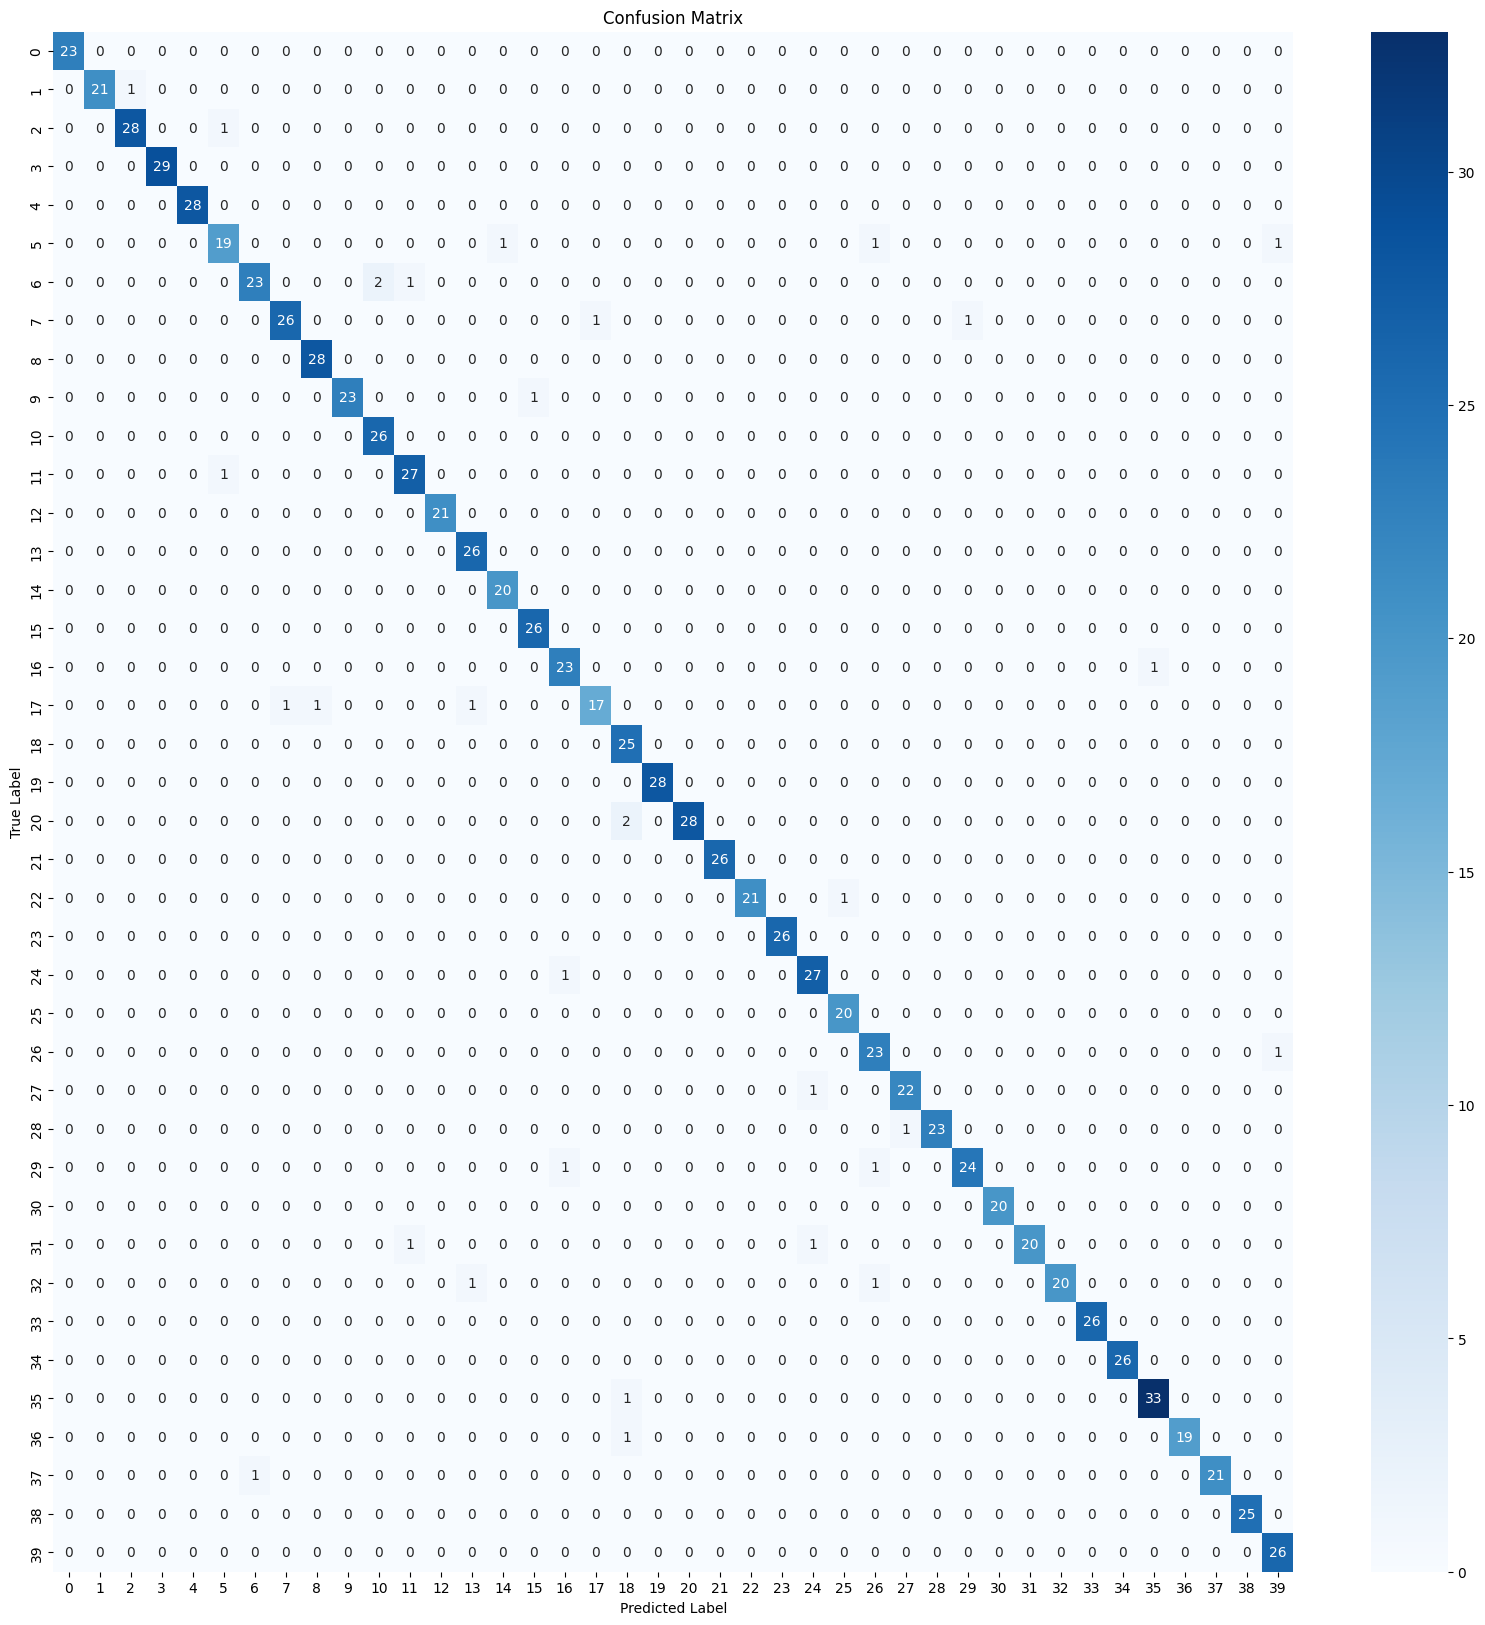

In [67]:
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
plt.figure(figsize=(20, 20))
confusion = confusion_matrix(y_test - 1, y_pred)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [10]:
automl_model = random_search
print("Best model pipeline:")
print(automl_model.named_steps["classifier"].leaderboard())

Best model pipeline:
          rank  ensemble_weight        type      cost   duration
model_id                                                        
289          1             0.20  libsvm_svc  0.019802  15.356845
230          2             0.05  libsvm_svc  0.020564  17.413994
290          3             0.10  libsvm_svc  0.020564  15.760114
198          4             0.05  libsvm_svc  0.021325  19.152060
212          5             0.30  libsvm_svc  0.021325  14.185717
221          6             0.10  libsvm_svc  0.021325  12.484046
226          7             0.05  libsvm_svc  0.021325  12.562099
240          8             0.10  libsvm_svc  0.021325  12.703297
295          9             0.05  libsvm_svc  0.021325  12.795120
